# Lead Score - Case study

### Importing basic necessary libraries.

In [1]:
#numpy and pandas
import pandas as pd
import numpy as np


In [2]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Data Preparation and Data Loading

### **Data Reading**

In [4]:
# Reading the data and importing into the DataFrame.
data_file = pd.read_csv("Leads.csv")

In [5]:
data_file.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### **Data Inspection**

In [6]:
# Checking the shape of dataset.
data_file.shape

(9240, 37)

In [7]:
# Checking the nature of data  and necesary information of dataset
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking the data distribution.
data_file.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
#Reading all the column names to have a better understanding.
data_file.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### **Data Cleaning**

In [10]:
# converting select as NaN as they are as good as null value
data_file = data_file.replace('Select',np.nan)

In [11]:
#summing up all the null values in every column.
data_file.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#Checking the percentage of null values in descending order.
((data_file.isnull().sum()/len(data_file))*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Dropping 'Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score','Leads Quaity','Lead Profile', 'How did you hear about X Education' as they have almost 50% or more missing values


In [13]:
data_file.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','Lead Profile'],axis =1, inplace = True)

#### **Lead Source**

In [14]:
data_file['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

In [15]:
#replacing the unique data with relevant category .
data_file['Lead Source'] =data_file['Lead Source'].replace('Google','google')
data_file['Lead Source'] = data_file['Lead Source'].replace(np.nan,'other')
data_file['Lead Source'] = data_file['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','Social Media','Pay per Click Ads','welearnblog_Home','testone','blog','youtubechannel','NC_EDM','WeLearn'],'other')

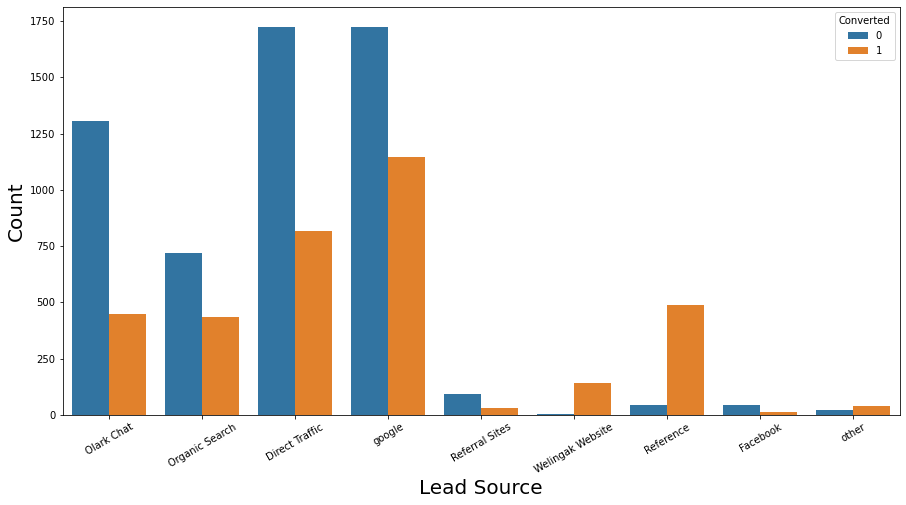

In [16]:
plt.figure(figsize = (15,7.5))
sns.countplot(x = data_file['Lead Source'], hue = data_file.Converted)
plt.rcParams.update({'font.size': 8})
plt.xticks(rotation=30)
plt.xlabel('Lead Source', size = 20)
plt.ylabel('Count', size = 20)
plt.show()


##### **Inferences:**

*  Google & Direct traffic generates maximum number of the leads.

*   Conversion rate of the welingak website and reference leads is high.




**To improve the overall lead conversion rate, we should focus on the Organic Search,Olark Chat,Direct Traffic and google leads in the Lead Source and generates more leads. **

#### **Total Visits**

In [17]:
data_file['TotalVisits'].value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [18]:
data_file['TotalVisits'].describe(percentiles = [0.05,0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:ylabel='TotalVisits'>

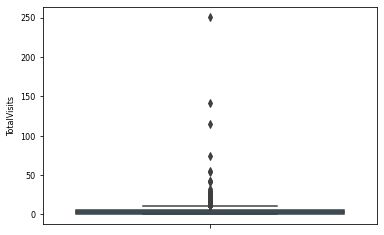

In [19]:
#checking outliers.
sns.boxplot(y = data_file['TotalVisits'])

As we can see their are Lots of Outliers in the data.

<AxesSubplot:ylabel='TotalVisits'>

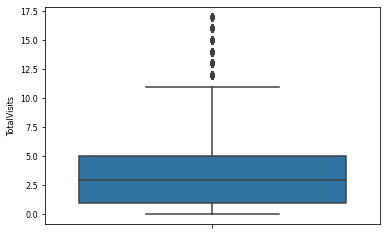

In [20]:
# removing outliers
data_file = data_file[data_file.TotalVisits<=data_file.TotalVisits.quantile(0.99)]
sns.boxplot(y = data_file['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

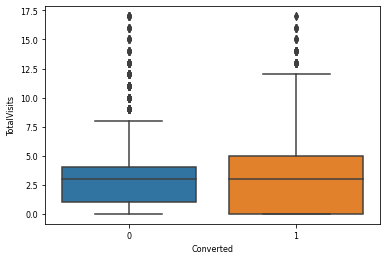

In [21]:
sns.boxplot(y = data_file['TotalVisits'], x = data_file.Converted)

***Inferences:***
**Median for converted and not converted leads are same.**

In [22]:
data_file.shape

(9020, 31)

**Country**

In [23]:
data_file.Country.value_counts(dropna = False)

India                   6412
NaN                     2324
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
Canada                     4
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
unknown                    4
Sweden                     3
Philippines                2
Bangladesh                 2
Belgium                    2
Italy                      2
Ghana                      2
China                      2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
Liberia                    1
Kenya                      1
Indonesia                  1
Malaysia                   1
Denmark                    1
Switzerland   

***Inferences:*** **Most values are of 'India' and then comes null values.**

In [24]:
#as most of the data contains India and high null values
data_file.drop('Country',axis = 1, inplace = True)

**City**

In [25]:
# similarly for city
data_file.City.value_counts(dropna = False)

NaN                            3591
Mumbai                         3135
Thane & Outskirts               732
Other Cities                    671
Other Cities of Maharashtra     446
Other Metro Cities              372
Tier II Cities                   73
Name: City, dtype: int64

***Inferences:*** **Null values are having highest number followed by 'Mumbai'.**

In [26]:
# removing it as well as high null value and Mumbai is predominant

In [27]:
#as most of the data contains India and high null values
data_file.drop('City',axis = 1, inplace = True)

In [28]:
data_file.drop('How did you hear about X Education',axis = 1, inplace = True)

**Specialization**

In [29]:
data_file.Specialization.value_counts(dropna = False)

NaN                                  3293
Finance Management                    954
Human Resource Management             826
Marketing Management                  819
Operations Management                 498
Business Administration               393
IT Projects Management                363
Supply Chain Management               343
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
Healthcare Management                 152
E-COMMERCE                            110
Hospitality Management                109
Retail Management                      97
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

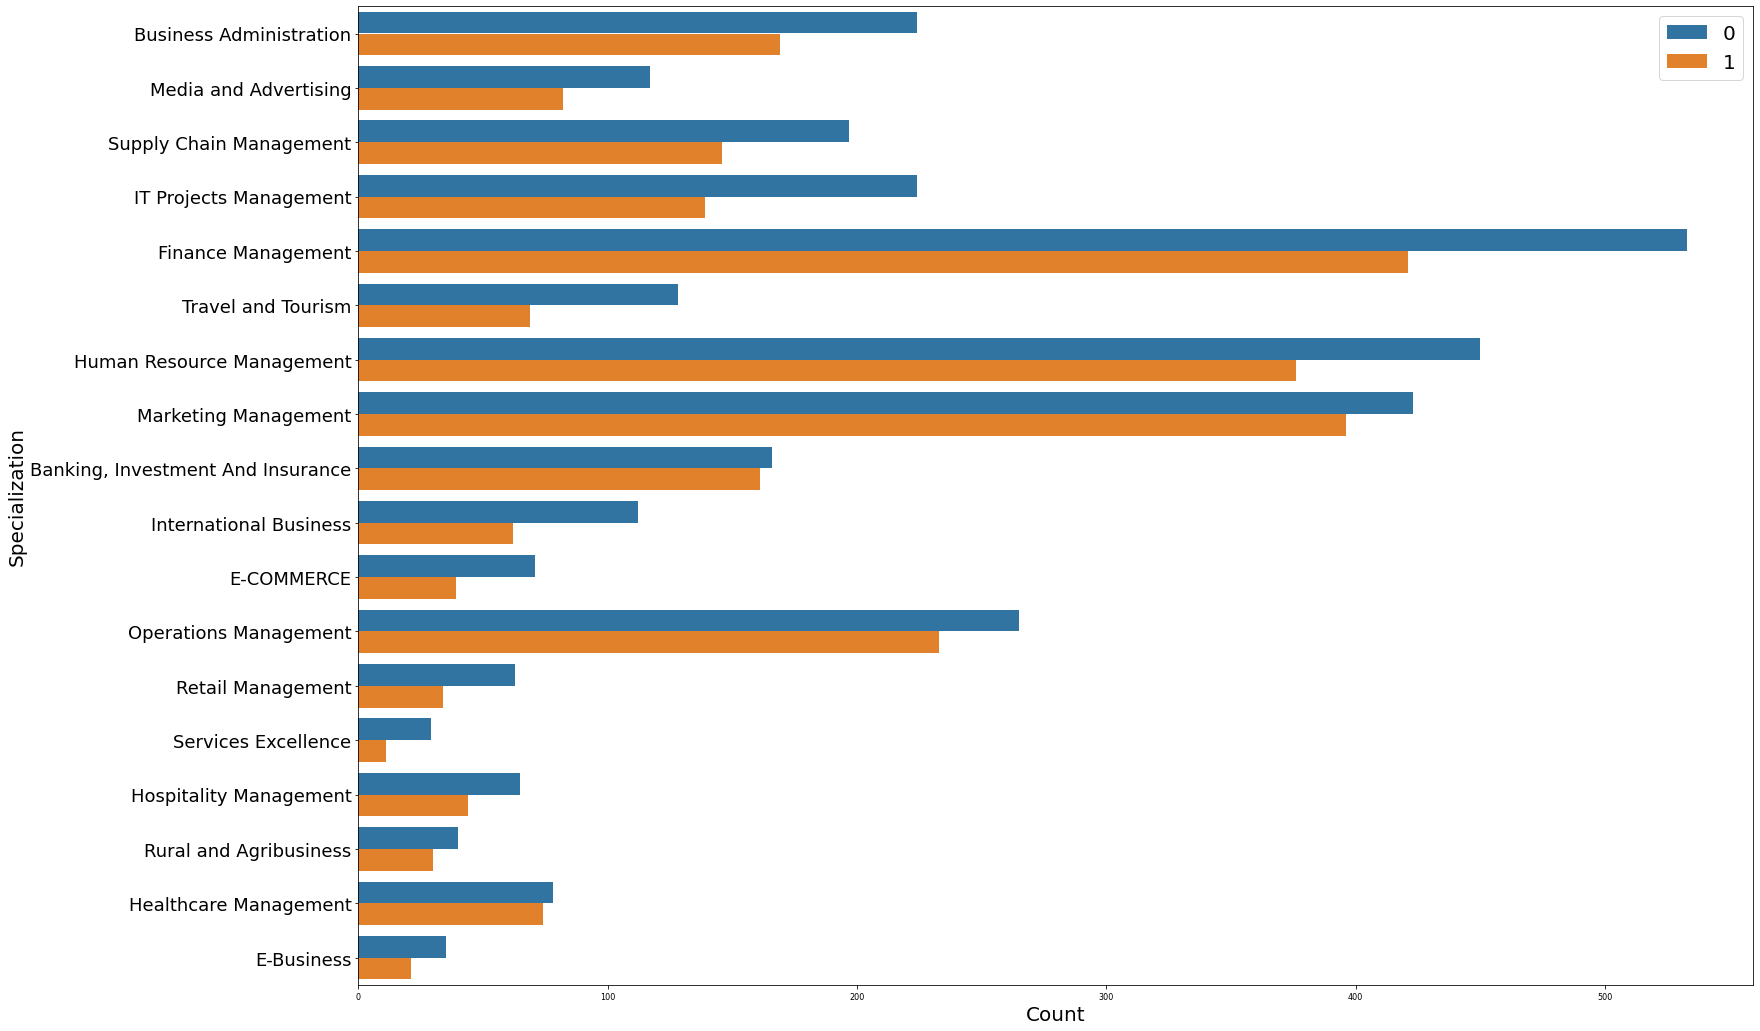

In [30]:
plt.figure(figsize = (25,18))
ax=sns.countplot(y = data_file.Specialization, hue = data_file["Converted"])
plt.xlabel('Count', size = 20)
plt.ylabel('Specialization', size = 20)
plt.yticks(fontsize=18)
ax.legend(fontsize = 20) 
plt.show()

In [31]:
# NaN accounts for Specialization that are not mentioned(like Student)
#replacing that with NotSpecified
data_file.Specialization.replace(np.nan,'NotSpecified',inplace = True)

**What is your current occupation**

In [32]:
data_file['What is your current occupation'].value_counts(dropna = False)

Unemployed              5447
NaN                     2665
Working Professional     672
Student                  206
Other                     13
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

Unemployed have highest entries.

In [33]:
data_file['What is your current occupation'].replace(np.nan,'Unemployed',inplace = True)

**What matters most to you in choosing a course**

In [34]:
data_file['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6335
NaN                          2683
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

Most entries are 'Better Career Prospects'. 

In [35]:
data_file.drop('What matters most to you in choosing a course',axis = 1,inplace = True)

**Tags**

In [36]:
data_file.Tags.value_counts(dropna = False)

NaN                                                  3308
Will revert after reading the email                  2017
Ringing                                              1173
Interested in other courses                           506
Already a student                                     464
Closed by Horizzon                                    292
switched off                                          239
Busy                                                  185
Lost to EINS                                          171
Not doing further education                           138
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [37]:
data_file.Tags.replace(np.nan,'NotSpecified',inplace = True)

Now as data has no missing values, we can move forward.
 

## **Exploratory Data Analysis**

In [38]:
data_file.shape

(9020, 27)

In [39]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9020 non-null   object 
 1   Lead Number                               9020 non-null   int64  
 2   Lead Origin                               9020 non-null   object 
 3   Lead Source                               9020 non-null   object 
 4   Do Not Email                              9020 non-null   object 
 5   Do Not Call                               9020 non-null   object 
 6   Converted                                 9020 non-null   int64  
 7   TotalVisits                               9020 non-null   float64
 8   Total Time Spent on Website               9020 non-null   int64  
 9   Page Views Per Visit                      9020 non-null   float64
 10  Last Activity                       

#### Univariate Analysis

**Lead** **Origin**

In [40]:
data_file['Lead Origin'].value_counts()

Landing Page Submission    4820
API                        3562
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

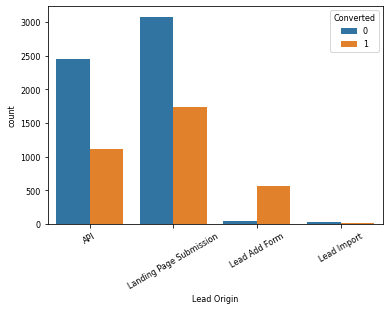

In [41]:
sns.countplot(x = data_file['Lead Origin'],hue = data_file.Converted)
plt.rcParams.update({'font.size': 8})
plt.xticks(rotation=30)
plt.show()

 API and Landing page show a good conversion rate and are good enough in number.<br>
 While Lead Add form has high conversion rate but do not have enough counts.

**Lead Source**

In [42]:
#Lead Source
data_file['Lead Source'].value_counts()

google              2855
Direct Traffic      2512
Olark Chat          1751
Organic Search      1125
Reference            442
Welingak Website     129
Referral Sites       123
other                 52
Facebook              31
Name: Lead Source, dtype: int64

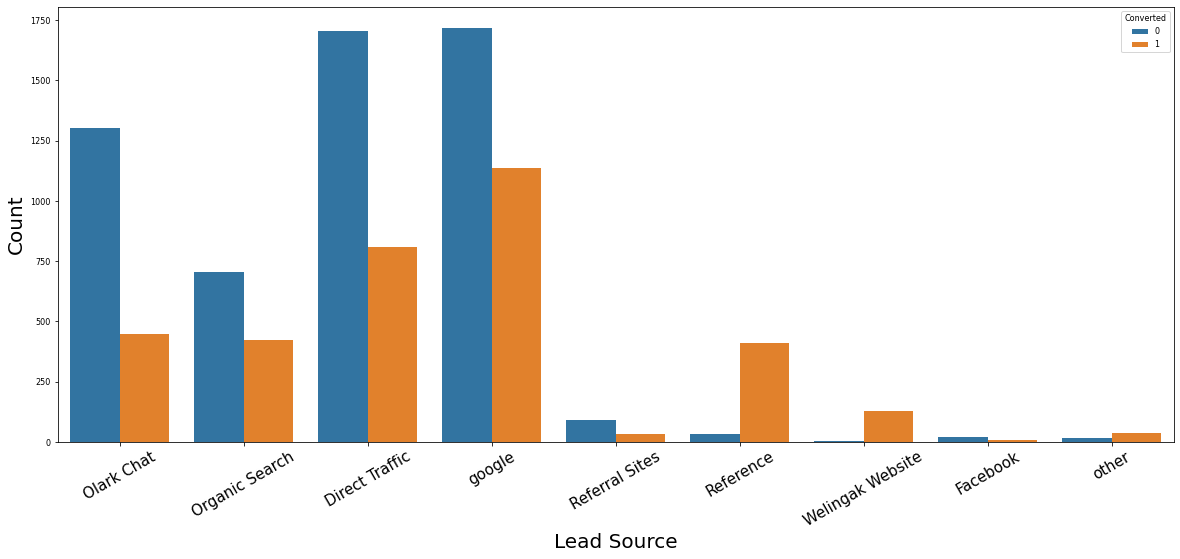

In [43]:
plt.figure(figsize = (20,8))
sns.countplot(x = data_file['Lead Source'],hue = data_file.Converted)
plt.xticks(rotation=30,fontsize=15)
plt.xlabel('Lead Source', size = 20)
plt.ylabel('Count', size = 20)

plt.show()

Most of the leads are generated by Google and Direct Traffic which also has good conversion rate.<br>
Leads by reference is mostly converted and same goes with Welingak Website.

**Do Not Email**

In [44]:
data_file['Do Not Email'].value_counts()

No     8313
Yes     707
Name: Do Not Email, dtype: int64

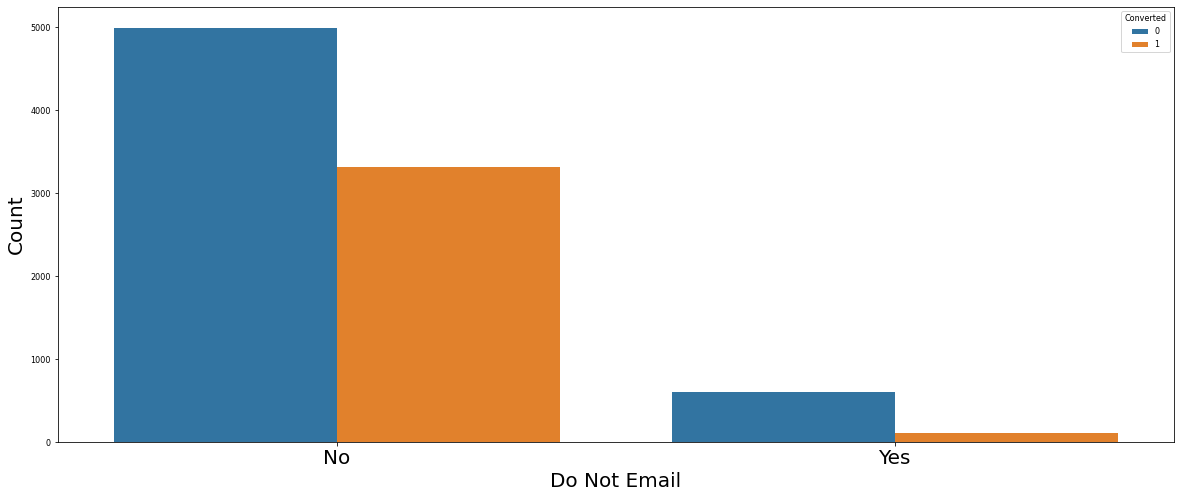

In [45]:
plt.figure(figsize = (20,8))
sns.countplot(x = data_file['Do Not Email'],hue = data_file.Converted)
plt.xticks(fontsize=20)
plt.xlabel('Do Not Email', size = 20)
plt.ylabel('Count', size = 20)
plt.show()

In [46]:
data_file['Do Not Call'].value_counts()

No     9018
Yes       2
Name: Do Not Call, dtype: int64

In [47]:
data_file.drop('Do Not Call',axis = 1,inplace = True)

In [48]:
data_file.Converted.value_counts()

0    5595
1    3425
Name: Converted, dtype: int64

Variance is fine.

**TotalVisits**

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

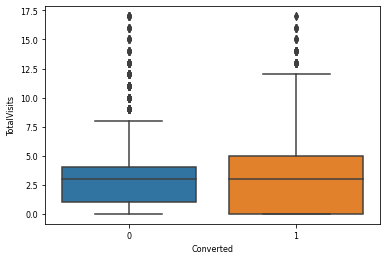

In [49]:
sns.boxplot(x = data_file.Converted,y = data_file['TotalVisits'])

Both converted and not converted has almost same median from total visits.

**Total Time Spent on Website**

<AxesSubplot:ylabel='Total Time Spent on Website'>

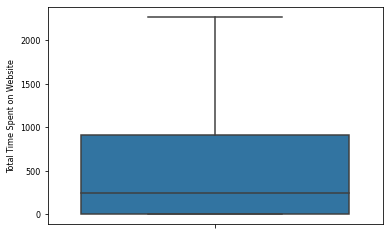

In [50]:
sns.boxplot(y = data_file['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

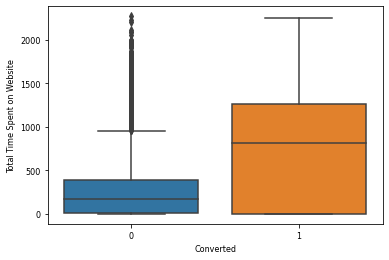

In [51]:
sns.boxplot(x = data_file.Converted,y = data_file['Total Time Spent on Website'])

Those converted leads have more amount of median time on website than not converted leads interactive and immersive website with good UI UX can be a game changer.

**Pages Views Per Visit**

<AxesSubplot:xlabel='Page Views Per Visit'>

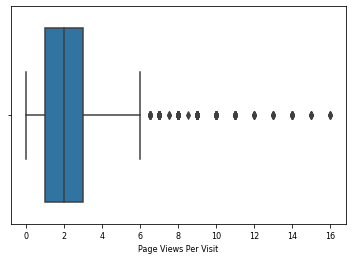

In [52]:
sns.boxplot(x = data_file['Page Views Per Visit'])

We can see that outliers are present here.

In [53]:
data_file['Page Views Per Visit'].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [54]:
limit = data_file['Page Views Per Visit'].quantile(0.95)
data_file = data_file[data_file['Page Views Per Visit']<=limit]

In [55]:
data_file.shape

(8675, 26)

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

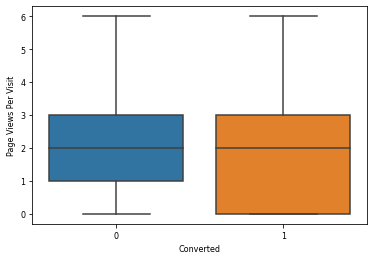

In [56]:
sns.boxplot(x = data_file.Converted,y = data_file['Page Views Per Visit'])

There is no difference in median of the page views for converted and not converted leads. 

**Last Activity**

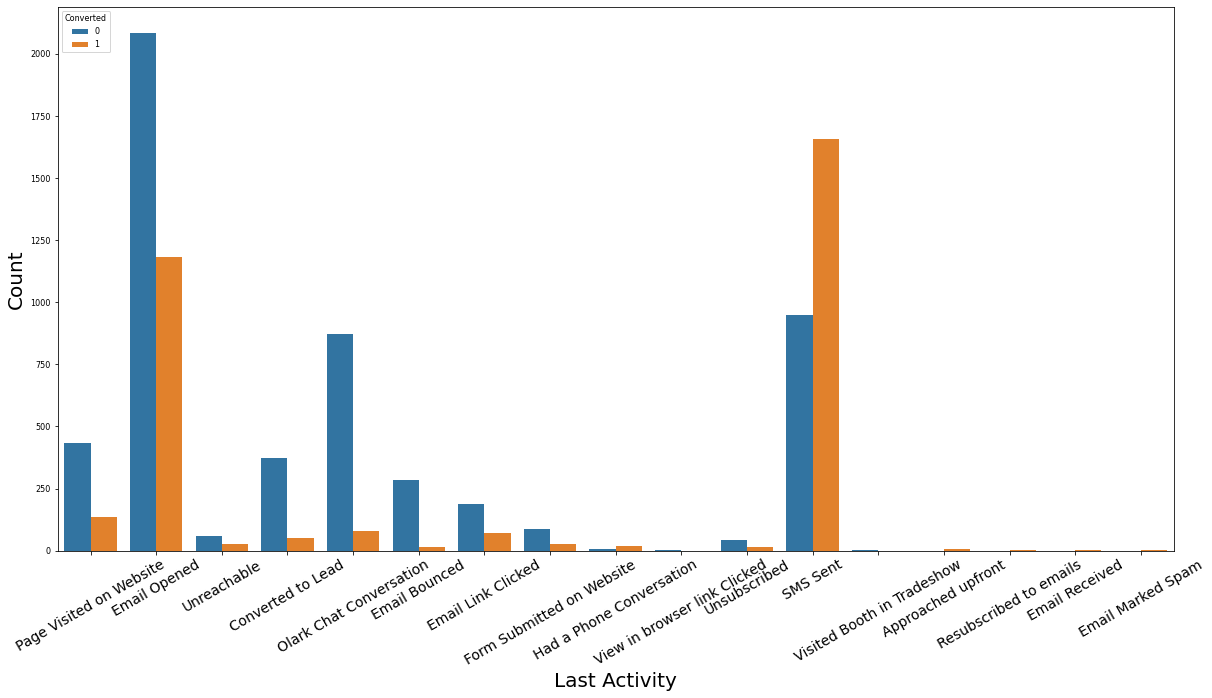

In [57]:
#Last Activity
plt.figure(figsize = (20,10))
sns.countplot(x = data_file["Last Activity"], hue = data_file.Converted)
plt.xlabel('Last Activity', size = 20)
plt.ylabel('Count', size = 20)
plt.xticks(rotation=30,size=14)
plt.show()

In [58]:
data_file['Last Activity'].replace(['Had a Phone Conversation', 
                             'View in browser link Clicked', 
                            'Visited Booth in Tradeshow', 'Approached upfront',
                            'Resubscribed to emails','Email Received', 
                             'Email Marked Spam'], 'Other_Activity',inplace = True)

Most of the leads are from email opened.


SmS sent has the highest conversion rate among all of them.

In [59]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8675 non-null   object 
 1   Lead Number                               8675 non-null   int64  
 2   Lead Origin                               8675 non-null   object 
 3   Lead Source                               8675 non-null   object 
 4   Do Not Email                              8675 non-null   object 
 5   Converted                                 8675 non-null   int64  
 6   TotalVisits                               8675 non-null   float64
 7   Total Time Spent on Website               8675 non-null   int64  
 8   Page Views Per Visit                      8675 non-null   float64
 9   Last Activity                             8675 non-null   object 
 10  Specialization                      

**Specialization**

In [60]:
data_file.Specialization.value_counts()

NotSpecified                         3245
Finance Management                    917
Human Resource Management             788
Marketing Management                  786
Operations Management                 481
Business Administration               374
IT Projects Management                348
Supply Chain Management               323
Banking, Investment And Insurance     301
Media and Advertising                 189
Travel and Tourism                    173
International Business                164
Healthcare Management                 140
Hospitality Management                103
E-COMMERCE                             99
Retail Management                      89
Rural and Agribusiness                 65
E-Business                             52
Services Excellence                    38
Name: Specialization, dtype: int64

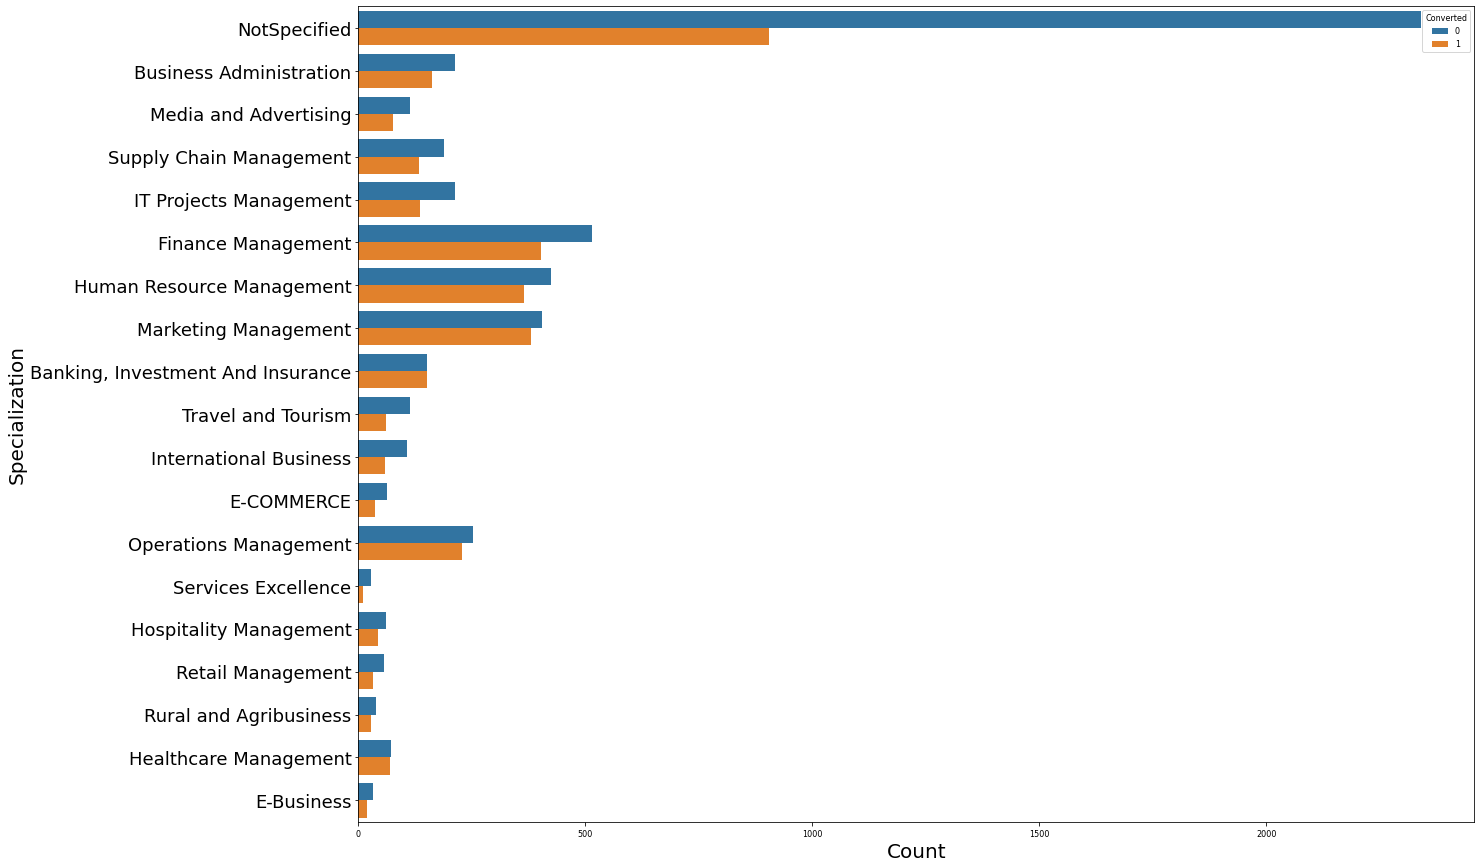

In [61]:
plt.figure(figsize = (20,15))
sns.countplot(y = data_file["Specialization"], hue = data_file["Converted"])
plt.xlabel('Count', size = 20)
plt.ylabel('Specialization', size = 20)
plt.yticks(fontsize=18)
plt.show()

In [62]:
data_file['What is your current occupation'].value_counts()

Unemployed              7799
Working Professional     649
Student                  200
Other                     12
Housewife                  9
Businessman                6
Name: What is your current occupation, dtype: int64

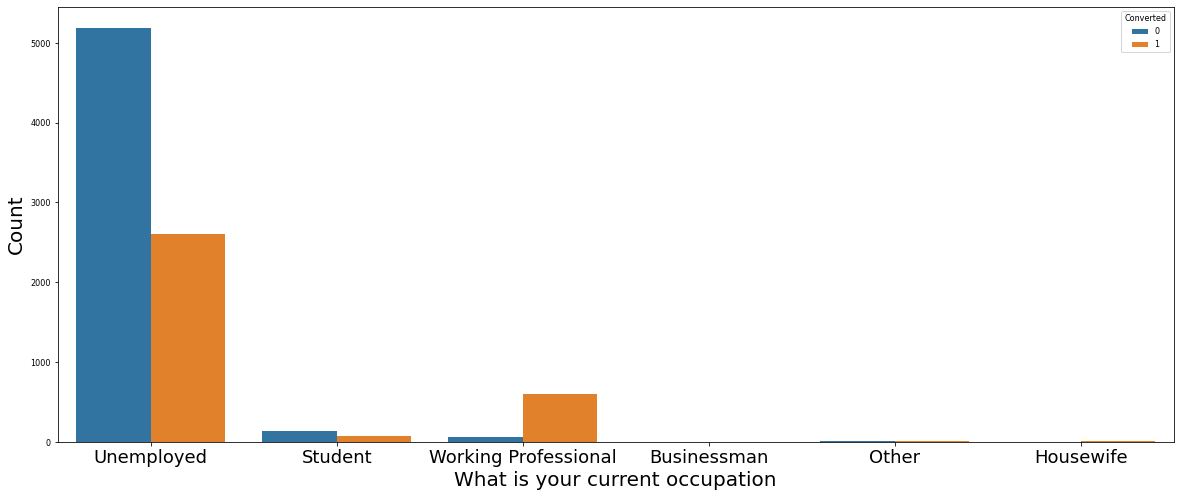

In [63]:
plt.figure(figsize = (20,8))
sns.countplot(x = data_file['What is your current occupation'], hue = data_file["Converted"])
plt.xticks(fontsize=18)
plt.xlabel('What is your current occupation', size = 20)
plt.ylabel('Count', size = 20)
plt.show()

Working Professionals have high conversion rate as compared to others.<br>
Most of the leads are generated by Unemployeds.

Drop the unnecessaries.

**Magazine**

In [64]:
data_file.drop('Magazine',axis =1,inplace = True )

**Newspaper Article**

In [65]:
data_file['Newspaper Article'].value_counts()

No    8675
Name: Newspaper Article, dtype: int64

In [66]:
data_file.drop('Newspaper Article',axis =1,inplace = True )

**X Education Forums**

In [67]:
data_file['X Education Forums'].value_counts()

No    8675
Name: X Education Forums, dtype: int64

In [68]:
data_file.drop('X Education Forums',axis =1,inplace = True )

**Newspaper**

In [69]:
data_file['Newspaper'].value_counts()

No     8674
Yes       1
Name: Newspaper, dtype: int64

In [70]:
data_file.drop('Newspaper',axis =1,inplace = True )

**Search**

In [71]:
data_file.drop('Search',axis =1,inplace = True )

**Digital Advertisement**

In [72]:
data_file['Digital Advertisement'].value_counts()

No     8673
Yes       2
Name: Digital Advertisement, dtype: int64

In [73]:
data_file.drop('Digital Advertisement',axis =1,inplace = True )

**Through Recommendations**

In [74]:
data_file['Through Recommendations'].value_counts()

No     8671
Yes       4
Name: Through Recommendations, dtype: int64

In [75]:
data_file.drop('Through Recommendations',axis =1,inplace = True )

**Receive More Updates About Our Courses**

In [76]:
data_file['Receive More Updates About Our Courses'].value_counts()

No    8675
Name: Receive More Updates About Our Courses, dtype: int64

In [77]:
data_file.drop('Receive More Updates About Our Courses',axis =1,inplace = True)

**TAGS**

In [78]:
data_file['Tags'].value_counts()

NotSpecified                                         3210
Will revert after reading the email                  1929
Ringing                                              1112
Interested in other courses                           488
Already a student                                     454
Closed by Horizzon                                    284
switched off                                          229
Busy                                                  174
Lost to EINS                                          167
Not doing further education                           134
Interested  in full time MBA                          110
Graduation in progress                                105
invalid number                                         73
Diploma holder (Not Eligible)                          62
wrong number given                                     42
opp hangup                                             30
number not provided                                    25
in touch with 

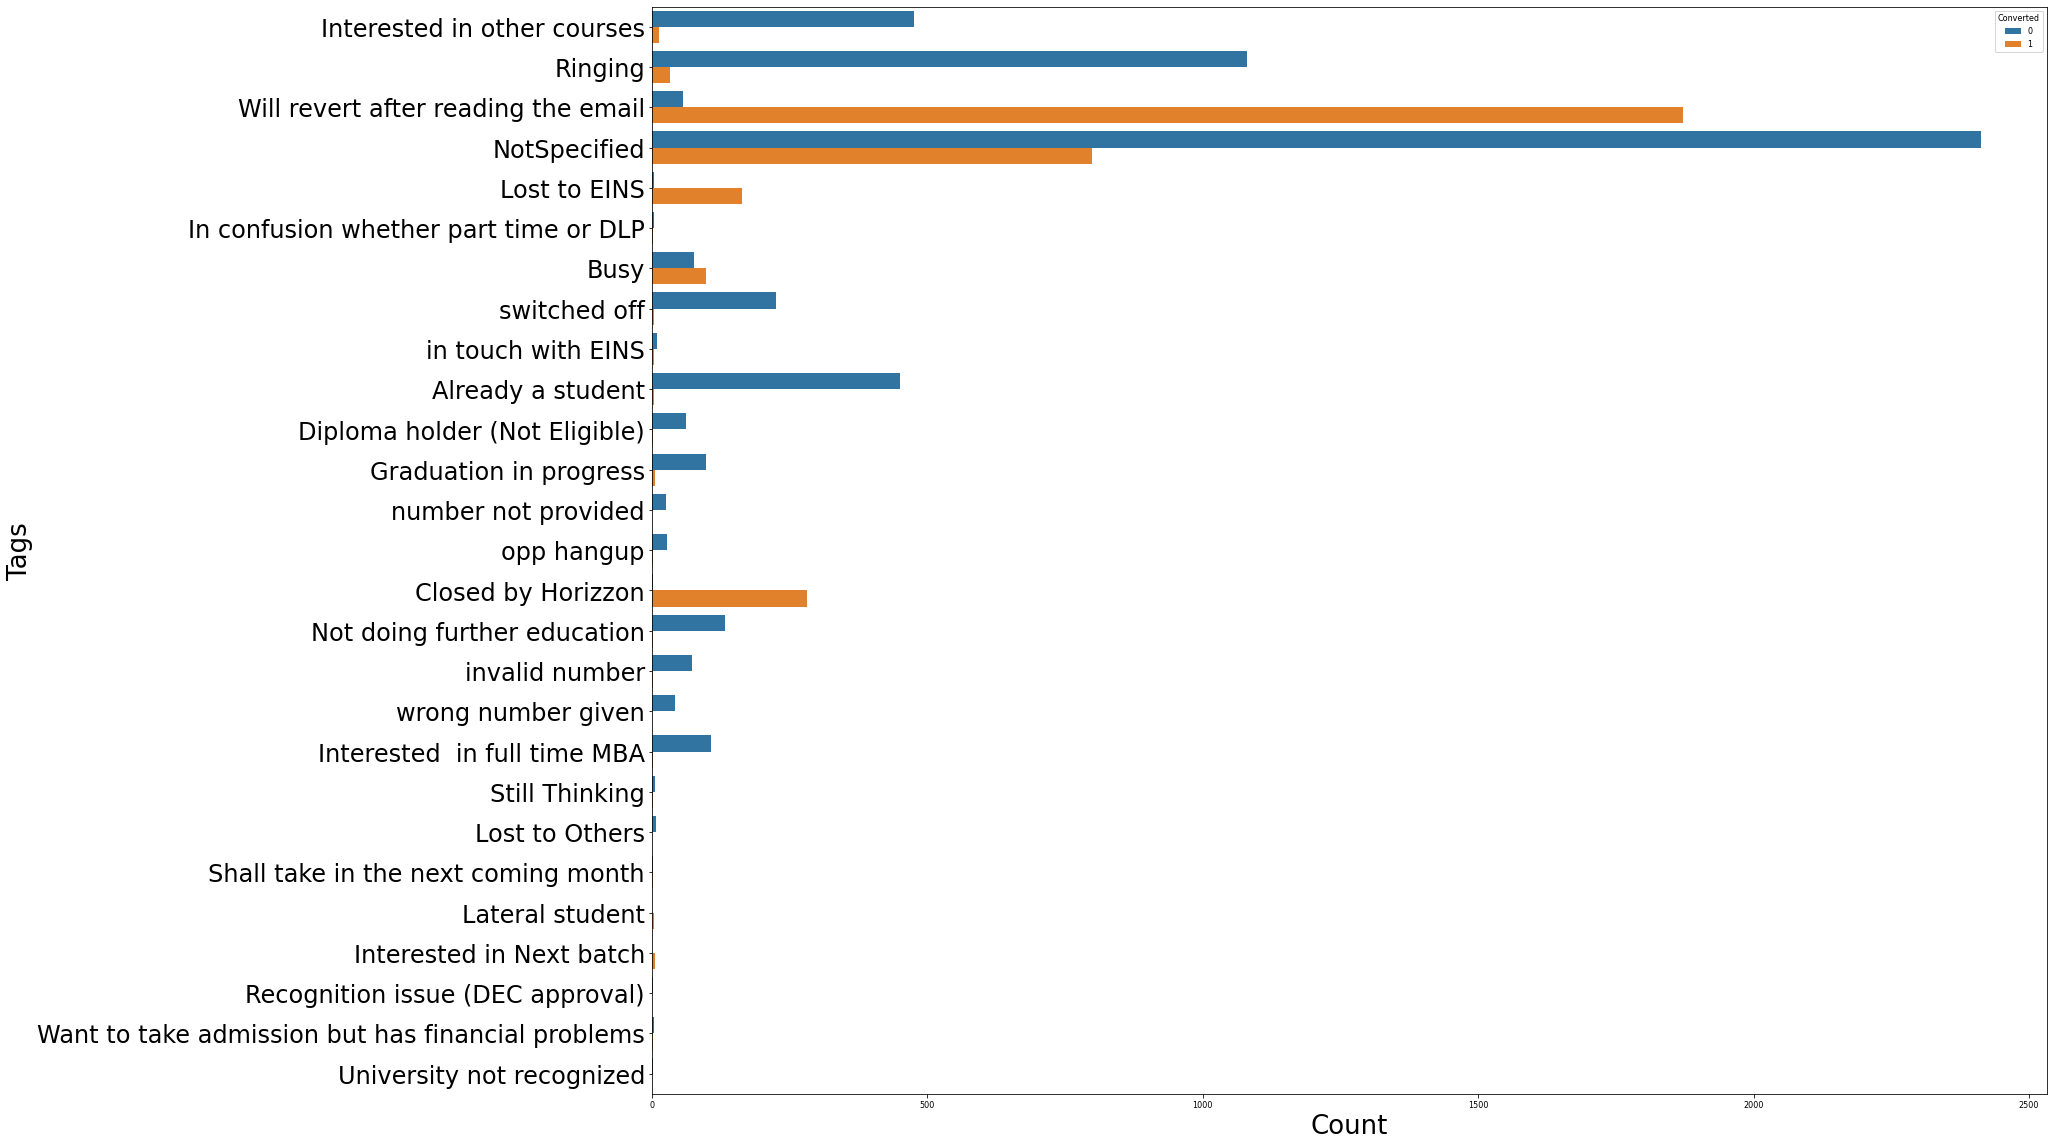

In [79]:
plt.figure(figsize = (25,20))
sns.countplot(y = data_file['Tags'], hue = data_file["Converted"])
plt.yticks(fontsize=24)
plt.xlabel('Count', size = 26)
plt.ylabel('Tags', size = 26)
plt.show()


In [80]:
data_file['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                    'Diploma holder (Not Eligible)',
                    'Approached upfront','Graduation in progress','number not provided',
                    'opp hangup','Still Thinking',
                    'Lost to Others','Shall take in the next coming month','Lateral student',
                    'Interested in Next batch',
                    'Recognition issue (DEC approval)',
                    'Want to take admission but has financial problems',
                    'University not recognized'], 'Other',inplace = True)

In [81]:
# Information of data set
data_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8675 non-null   object 
 1   Lead Number                               8675 non-null   int64  
 2   Lead Origin                               8675 non-null   object 
 3   Lead Source                               8675 non-null   object 
 4   Do Not Email                              8675 non-null   object 
 5   Converted                                 8675 non-null   int64  
 6   TotalVisits                               8675 non-null   float64
 7   Total Time Spent on Website               8675 non-null   int64  
 8   Page Views Per Visit                      8675 non-null   float64
 9   Last Activity                             8675 non-null   object 
 10  Specialization                      

Drop the unnecessaries

In [82]:
data_file.drop('Update me on Supply Chain Content',axis = 1,inplace = True)

In [83]:
data_file.drop('Get updates on DM Content',axis = 1,inplace = True)

In [84]:
data_file.drop('I agree to pay the amount through cheque',axis = 1,inplace = True)

In [85]:
data_file.drop('A free copy of Mastering The Interview',axis = 1,inplace = True)

In [86]:
data_file.drop('Last Notable Activity',axis = 1,inplace = True)

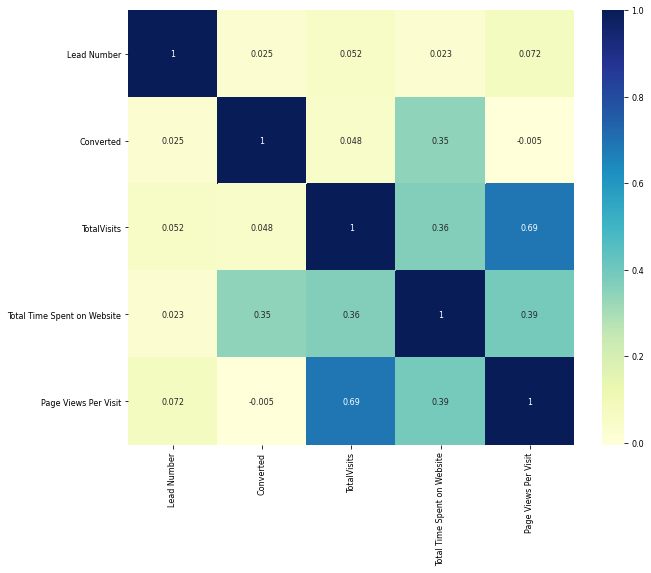

In [87]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data_file.corr(), cmap="YlGnBu", annot=True)
plt.show()


## Encoding and Scaling

### **Creating Dummies**

In [88]:
#converting some binary variables to 1/0
data_file['Do Not Email']=data_file['Do Not Email'].map({'Yes': 1, "No": 0})

For categorical variables:

In [89]:
#Creating a dummy variable for some of the categorical variables and dropping the first one
Temp = pd.get_dummies(data_file[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags']], drop_first=True)
Temp.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,...,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_NotSpecified,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [90]:
# Adding the results to the master dataframe
data = pd.concat([data_file, Temp], axis=1)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_NotSpecified,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,1,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,1,0,0,0


Dropping Unnecessaries.

In [91]:
data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags'], axis = 1,inplace = True)

In [92]:
data.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_NotSpecified,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


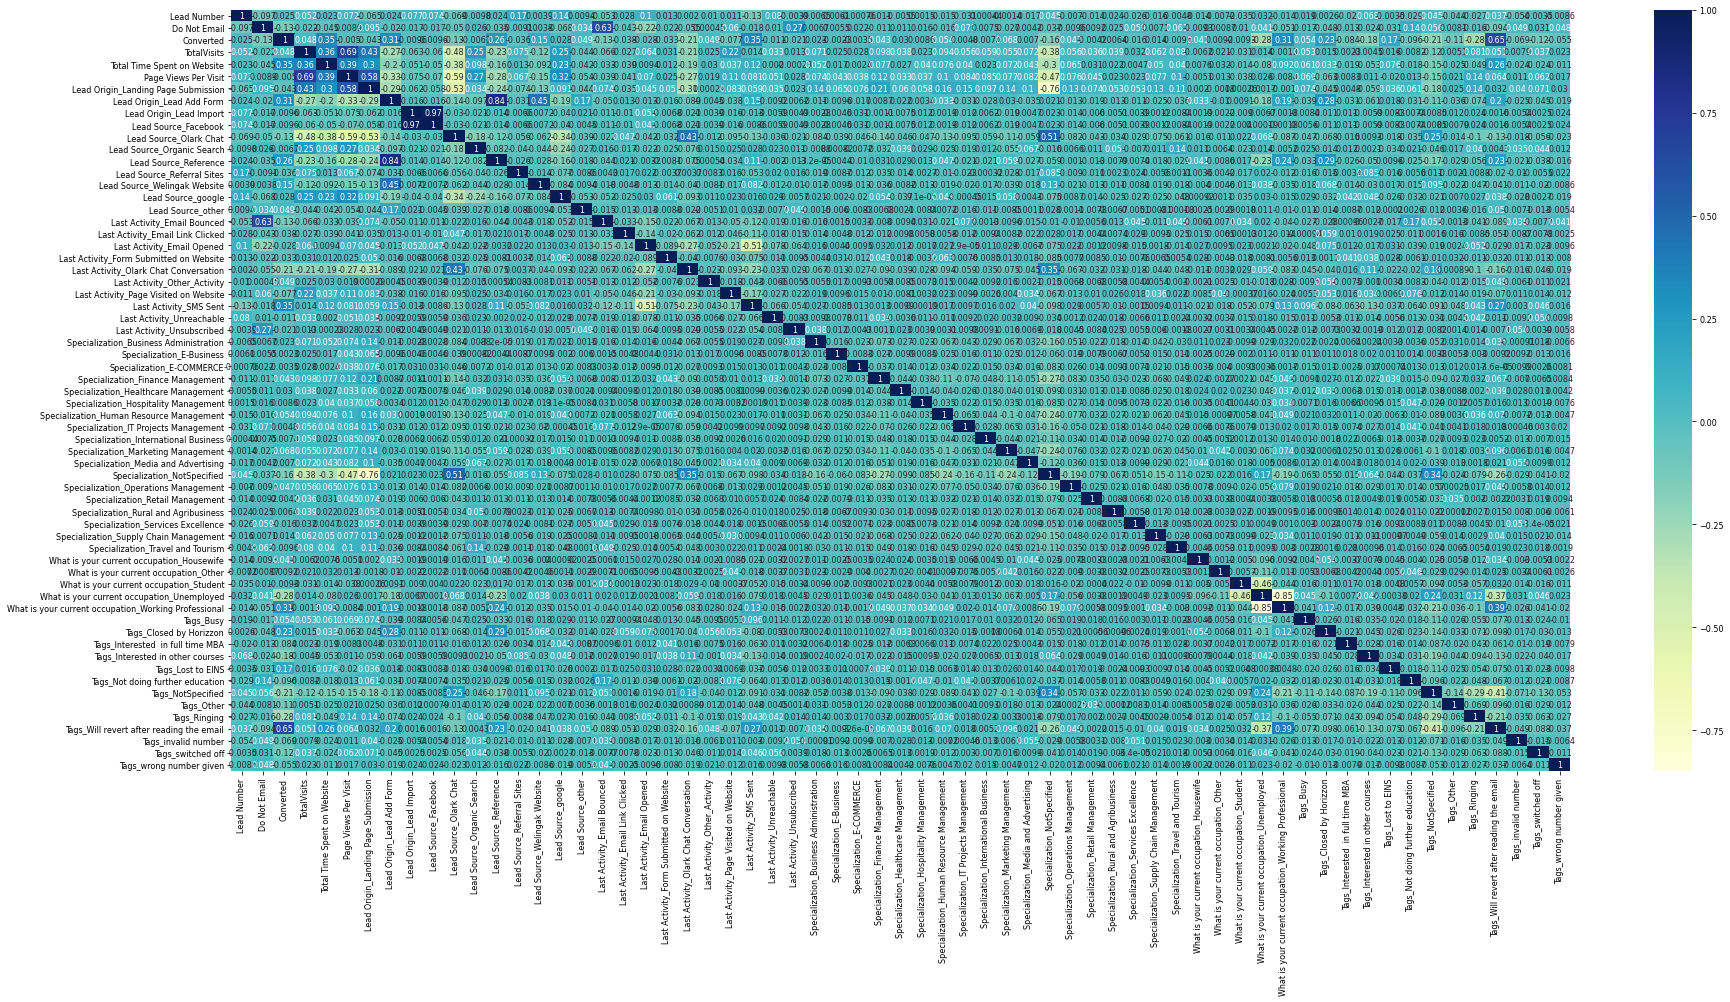

In [93]:
#heatmap
plt.figure(figsize=(30,14))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Since this heatmap is very crowded and the correlations are not perfectly visible so we refer to RFE.

In [94]:
#Putting response variable to y
y = data.pop('Converted')
X = data.copy()

In [95]:
# as "Prospect ID", "Lead Number" are just indicative of unique IDs they can be dropped
X.drop("Prospect ID",axis =1, inplace = True)
X.drop("Lead Number",axis =1, inplace = True)

## **Splitting the data set into train and test.**

In [96]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

**Feature Scaling**

In [97]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [98]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Model building

Running Our First Training Model

### Model 1

In [99]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6072
Model:                            GLM   Df Residuals:                     6010
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1197.1
Date:                Mon, 24 May 2021   Deviance:                       2394.2
Time:                        01:04:49   Pearson chi2:                 9.30e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.2841      4.362     -1.670      0.095     -15.833       1.265
Do Not Email                                            -1.0422      0.319     -3.271      0.001      -1.667      -0.418
TotalVisits                                              0.2802      0.076      3.667      0.000       0.130       0.430
Total Time Spent on Website                              1.0741      0.064     16.807      0.000       0.949       1.199
Page Views Per Visit                                    -0.2883      0.098     -2.934      0.003      -0.481      -0.096
Lead Origin_Landing Page Submission                     -0.8180      0.236     -3.463      0.001      -1.281      -0.355
Lead Origin_Lead Add Form                                2.3491      1.306      1.799      0.072      -0.210       4.909
Lead Origin_Lead Import                                  2.2367      1.761      1.270      0.204      -1.215       5.689
Lead Source_Facebook                                    -2.0213      1.743     -1.160      0.246      -5.437       1.395
Lead Source_Olark Chat                                   0.9807      0.243      4.038      0.000       0.505       1.457
Lead Source_Organic Search                               0.0204      0.229      0.089      0.929      -0.429       0.470
Lead Source_Reference                                   -1.0963      1.401     -0.782      0.434      -3.842       1.650
Lead Source_Referral Sites                              -0.1617      0.494     -0.328      0.743      -1.129       0.806
Lead Source_Welingak Website                             2.6854      1.494      1.797      0.072      -0.243       5.614
Lead Source_google                                       0.1767      0.161      1.098      0.272      -0.139       0.492
Lead Source_other                                        0.8419      0.868      0.970      0.332      -0.860       2.543
Last Activity_Email Bounced                              0.6234      0.684      0.912      0.362      -0.717       1.963
Last Activity_Email Link Clicked                         1.0410      0.491      2.118      0.034       0.078       2.004
Last Activity_Email Opened                               1.7666      0.380      4.647      0.000       1.021       2.512
Last Activity_Form Submitted on Website                  0.6789      0.662      1.025      0.305      -0.619       1.977
Last Activity_Olark Chat Conversation                   -0.0467      0.429     -0.109      0.913      -0.888       0.795
Last Activity_Other_Activity                             1.5753      1.119      1.407      0.159      -0.619       3.769
Last Activity_Page Visited on Website                    0

### **Feature Selection Using RFE**

## Model Predictions

In [100]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(LR, 15)             
rfe = rfe.fit(X_train, y_train)

#runnung RFE with 15 variables

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 34),
 ('Lead Source_other', False, 11),
 ('Last Activity_Email Bounced', False, 35),
 ('Last Activity_Email Link Clicked', False, 25),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 43),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Other_Activity', False, 15),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unrea

In [102]:
l = X_train.columns[rfe.support_]

### Model 2

In [103]:
X_train = sm.add_constant(X_train[l])
log2 = sm.GLM(y_train,X_train, family = sm.families.Binomial()).fit()
log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6072
Model:                            GLM   Df Residuals:                     6056
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1266.1
Date:                Mon, 24 May 2021   Deviance:                       2532.2
Time:                        01:04:55   Pearson chi2:                 8.00e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4374      0.261    -20.857      0.000      -5.948      -4.926
Total Time Spent on Website                  1.0795      0.061     17.811      0.000       0.961       1.198
Lead Origin_Lead Add Form                    2.1673      0.445      4.865      0.000       1.294       3.040
Lead Source_Olark Chat                       1.3822      0.143      9.689      0.000       1.103       1.662
Lead Source_Welingak Website                 3.3557      0.854      3.930      0.000       1.682       5.029
Last Activity_Email Opened                   1.3104      0.141      9.269      0.000       1.033       1.588
Last Activity_SMS Sent                       2.9160      0.150     19.403      0.000       2.621       3.211
Tags_Busy                                    3.3606      0.318     10.561      0.000       2.737       3.984
Tags_Closed by Horizzon                      8.2355      0.762     10.808      0.000       6.742       9.729
Tags_Lost to EINS                            7.6541      0.649     11.800      0.000       6.383       8.925
Tags_Not doing further education           -21.3179   1.98e+04     -0.001      0.999   -3.87e+04    3.87e+04
Tags_NotSpecified                            2.3597      0.235     10.057      0.000       1.900       2.820
Tags_Ringing                                -0.9564      0.330     -2.897      0.004      -1.603      -0.309
Tags_Will revert after reading the email     6.9904      0.292     23.907      0.000       6.417       7.563
Tags_invalid number                        -22.9408   2.77e+04     -0.001      0.999   -5.42e+04    5.42e+04
Tags_switched off                           -1.3384      0.655     -2.043      0.041      -2.623      -0.054
============================================================================================================
"""

In [104]:
X_train.drop('Tags_invalid number',axis = 1,inplace = True)

### Model 3

In [105]:
log3 = sm.GLM(y_train,X_train, family = sm.families.Binomial()).fit()
log3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6072
Model:                            GLM   Df Residuals:                     6057
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1268.8
Date:                Mon, 24 May 2021   Deviance:                       2537.5
Time:                        01:04:55   Pearson chi2:                 8.00e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.5306      0.262    -21.122      0.000      -6.044      -5.017
Total Time Spent on Website                  1.0755      0.060     17.808      0.000       0.957       1.194
Lead Origin_Lead Add Form                    2.1720      0.446      4.865      0.000       1.297       3.047
Lead Source_Olark Chat                       1.3788      0.142      9.682      0.000       1.100       1.658
Lead Source_Welingak Website                 3.3455      0.854      3.916      0.000       1.671       5.020
Last Activity_Email Opened                   1.3113      0.141      9.273      0.000       1.034       1.588
Last Activity_SMS Sent                       2.9034      0.150     19.352      0.000       2.609       3.197
Tags_Busy                                    3.4618      0.318     10.878      0.000       2.838       4.086
Tags_Closed by Horizzon                      8.3273      0.762     10.922      0.000       6.833       9.822
Tags_Lost to EINS                            7.7477      0.649     11.938      0.000       6.476       9.020
Tags_Not doing further education           -20.2185    1.2e+04     -0.002      0.999   -2.35e+04    2.35e+04
Tags_NotSpecified                            2.4586      0.235     10.448      0.000       1.997       2.920
Tags_Ringing                                -0.8504      0.330     -2.578      0.010      -1.497      -0.204
Tags_Will revert after reading the email     7.0845      0.293     24.156      0.000       6.510       7.659
Tags_switched off                           -1.2302      0.655     -1.879      0.060      -2.514       0.053
============================================================================================================
"""

In [106]:
X_train.drop('Tags_Not doing further education',axis = 1,inplace = True)

### Model 4

In [107]:
log4 = sm.GLM(y_train,X_train, family = sm.families.Binomial()).fit()
log4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6072
Model:                            GLM   Df Residuals:                     6058
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1270.2
Date:                Mon, 24 May 2021   Deviance:                       2540.4
Time:                        01:04:55   Pearson chi2:                 8.06e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.6060      0.260    -21.556      0.000      -6.116      -5.096
Total Time Spent on Website                  1.0772      0.060     17.834      0.000       0.959       1.196
Lead Origin_Lead Add Form                    2.1697      0.445      4.871      0.000       1.297       3.043
Lead Source_Olark Chat                       1.3840      0.142      9.714      0.000       1.105       1.663
Lead Source_Welingak Website                 3.3508      0.854      3.925      0.000       1.677       5.024
Last Activity_Email Opened                   1.3158      0.141      9.307      0.000       1.039       1.593
Last Activity_SMS Sent                       2.9074      0.150     19.385      0.000       2.613       3.201
Tags_Busy                                    3.5331      0.317     11.138      0.000       2.911       4.155
Tags_Closed by Horizzon                      8.4009      0.762     11.026      0.000       6.908       9.894
Tags_Lost to EINS                            7.8207      0.649     12.059      0.000       6.550       9.092
Tags_NotSpecified                            2.5287      0.234     10.803      0.000       2.070       2.988
Tags_Ringing                                -0.7808      0.329     -2.373      0.018      -1.426      -0.136
Tags_Will revert after reading the email     7.1574      0.292     24.506      0.000       6.585       7.730
Tags_switched off                           -1.1610      0.654     -1.774      0.076      -2.444       0.122
============================================================================================================
"""

In [108]:
X_train.drop('Tags_switched off',axis = 1,inplace = True)

### Model 5

In [109]:
log5 = sm.GLM(y_train,X_train, family = sm.families.Binomial()).fit()
log5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6072
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.2
Date:                Mon, 24 May 2021   Deviance:                       2544.3
Time:                        01:04:55   Pearson chi2:                 7.84e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.7951      0.252    -22.972      0.000      -6.290      -5.301
Total Time Spent on Website                  1.0749      0.060     17.828      0.000       0.957       1.193
Lead Origin_Lead Add Form                    2.1844      0.448      4.878      0.000       1.307       3.062
Lead Source_Olark Chat                       1.3825      0.142      9.714      0.000       1.104       1.661
Lead Source_Welingak Website                 3.3323      0.855      3.898      0.000       1.657       5.008
Last Activity_Email Opened                   1.3149      0.142      9.291      0.000       1.038       1.592
Last Activity_SMS Sent                       2.8858      0.150     19.301      0.000       2.593       3.179
Tags_Busy                                    3.7356      0.308     12.143      0.000       3.133       4.339
Tags_Closed by Horizzon                      8.5869      0.759     11.307      0.000       7.098      10.075
Tags_Lost to EINS                            8.0107      0.645     12.415      0.000       6.746       9.275
Tags_NotSpecified                            2.7270      0.223     12.255      0.000       2.291       3.163
Tags_Ringing                                -0.5736      0.319     -1.800      0.072      -1.198       0.051
Tags_Will revert after reading the email     7.3488      0.284     25.837      0.000       6.791       7.906
============================================================================================================
"""

###**Getting predicted values on the train set**

In [110]:
y_train_pred = log5.predict(X_train)
y_train_pred = y_train_pred.values.reshape(-1)

dataframe with id, predicted probablity, predicted conversion nd conversion

In [111]:
data.head()

,Prospect ID,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_NotSpecified,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,2.0,1428,1.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Creating a dataframe with the actual churn flag and the predicted probabilities**

In [112]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = data['Prospect ID']
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.009826,7927b2df-8bba-4d29-b9a2-b6e0beafe620
1,1,0.881131,2a272436-5132-4136-86fa-dcc88c88f482
2,0,0.004995,8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3,0,0.004512,0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4,1,0.992527,3256f628-e534-4826-9d63-4a8b88782852


**Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0**

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
#  the head of the set
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.009826,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0
1,1,0.881131,2a272436-5132-4136-86fa-dcc88c88f482,1
2,0,0.004995,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0
3,0,0.004512,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0
4,1,0.992527,3256f628-e534-4826-9d63-4a8b88782852,1


## **Model Evaluation**

#### Confusion Matrix

In [114]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3604  176]
 [ 298 1994]]


In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9219367588932806


# VIF

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.51
12,Tags_Will revert after reading the email,2.00
10,Tags_NotSpecified,1.85
2,Lead Origin_Lead Add Form,1.73
6,Last Activity_SMS Sent,1.61
11,Tags_Ringing,1.48
1,Total Time Spent on Website,1.46
5,Last Activity_Email Opened,1.41
4,Lead Source_Welingak Website,1.34
3,Lead Source_Olark Chat,1.32


### Plotting the ROC Curve

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

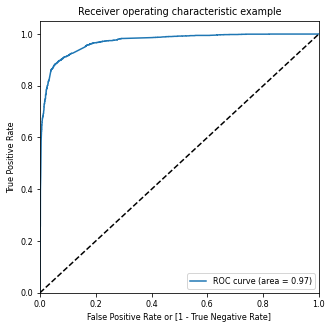

In [119]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [120]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.009826,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,1,0,0,0,0,0,0,0,0,0
1,1,0.881131,2a272436-5132-4136-86fa-dcc88c88f482,1,1,1,1,1,1,1,1,1,1,0
2,0,0.004995,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004512,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1,0,0,0,0,0,0,0,0,0
4,1,0.992527,3256f628-e534-4826-9d63-4a8b88782852,1,1,1,1,1,1,1,1,1,1,1


In [121]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_data_file = pd.DataFrame( columns = ['prob','accuracy','sensivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    sensivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data_file.loc[i] =[ i ,accuracy,sensivity,specificity]
print(cutoff_data_file)

     prob  accuracy  sensivity  specificity
0.0   0.0  0.377470   0.000000     1.000000
0.1   0.1  0.844203   0.766138     0.972949
0.2   0.2  0.879941   0.835714     0.952880
0.3   0.3  0.912055   0.912963     0.910558
0.4   0.4  0.919302   0.937302     0.889616
0.5   0.5  0.921937   0.953439     0.869983
0.6   0.6  0.911561   0.968783     0.817190
0.7   0.7  0.905303   0.975132     0.790140
0.8   0.8  0.892951   0.981217     0.747382
0.9   0.9  0.873353   0.988889     0.682810


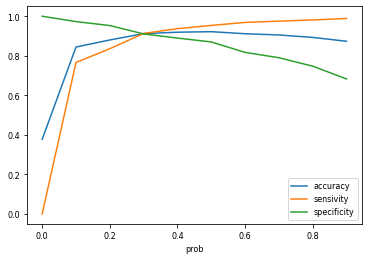

In [122]:
# Let's plot accuracy , sensitivity and specificity for various probabilities.
cutoff_data_file.plot.line(x='prob', y=['accuracy','sensivity','specificity'])
plt.show()

In [123]:
# From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.009826,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.881131,2a272436-5132-4136-86fa-dcc88c88f482,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.004995,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004512,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.992527,3256f628-e534-4826-9d63-4a8b88782852,1,1,1,1,1,1,1,1,1,1,1,1


Assigning Lead Score

In [124]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.009826,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0.881131,2a272436-5132-4136-86fa-dcc88c88f482,1,1,1,1,1,1,1,1,1,1,0,1,88
2,0,0.004995,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.004512,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0.992527,3256f628-e534-4826-9d63-4a8b88782852,1,1,1,1,1,1,1,1,1,1,1,1,99


In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8799407114624506

In [126]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3159,  621],
       [ 108, 2184]], dtype=int64)

In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9528795811518325

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.8357142857142857

#### Observation:
We see that our model is performing well. The ROC curve has a value of 0.97 area under the curve, which is very good. 

We have the following values for the Train Data:

* Accuracy : 87.99%
* Sensitivity : 95.28%
* Specificity : 83.57%

### Making predictions on the test set

In [130]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_NotSpecified,Tags_Ringing,Tags_Will revert after reading the email
3394,1.0,-0.186252,0,1,0,0,0,0,0,0,0,0,0
358,1.0,-0.868052,0,1,0,0,0,0,0,0,0,0,1
6670,1.0,-0.757490,0,0,0,1,0,0,0,0,0,0,0
3059,1.0,-0.318927,0,0,0,1,0,0,0,0,0,1,0
5633,1.0,-0.868052,0,1,0,0,1,0,0,0,0,0,1


In [131]:
X_train.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_NotSpecified',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [132]:
X_test = X_test[X_train.drop('const',1).columns]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_NotSpecified,Tags_Ringing,Tags_Will revert after reading the email
4891,-0.878531,0,1,0,1,0,0,0,0,0,0,1
3001,2.131029,0,0,0,0,1,1,0,0,0,0,0
3028,-0.878531,1,0,0,0,1,0,0,0,0,0,1
3957,1.981009,0,0,0,1,0,0,0,0,1,0,0
6360,-0.390049,0,0,0,0,1,0,0,0,0,1,0


In [133]:
X_test_sm = sm.add_constant(X_test)

In [134]:
y_test_pred = log5.predict(X_test_sm)

In [135]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [136]:
# Let's see the head
y_pred_1.head()

,0
4891,0.964663
3001,0.957582
3028,0.996597
3957,0.592938
6360,0.019798


In [137]:
# Converting y_test to dataframe
y_test_data_file = pd.DataFrame(y_test)

In [138]:
# Putting CustID to index
y_test_data_file['Prospect ID'] = y_test_data_file.index

In [139]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_data_file.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_data_file and y_pred_1
y_pred_final = pd.concat([y_test_data_file, y_pred_1],axis=1)

In [141]:
y_pred_final.head()


,Converted,Prospect ID,0
0,1,4891,0.964663
1,1,3001,0.957582
2,1,3028,0.996597
3,1,3957,0.592938
4,1,6360,0.019798


In [142]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [143]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [144]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,4891,1,0.964663
1,3001,1,0.957582
2,3028,1,0.996597
3,3957,1,0.592938
4,6360,1,0.019798


In [145]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)


In [146]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4891,1,0.964663,1
1,3001,1,0.957582,1
2,3028,1,0.996597,1
3,3957,1,0.592938,1
4,6360,1,0.019798,0


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8778332693046484

## **Precision and Recall**

#### Confusion Matrix

In [148]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1332,  271],
       [  47,  953]], dtype=int64)

In [149]:
#  Precision
# TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9188940092165898

In [150]:
#  Recall
#TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8699825479930192

In [151]:
data

,Prospect ID,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_NotSpecified,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.00,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.50,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,2.0,1532,2.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.00,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,2.0,1428,1.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,1,8.0,1845,2.67,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,0,2.0,238,2.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,1,2.0,199,2.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,0,3.0,499,3.00,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.953

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.8309419837804117

#### Observation:

After running the model on test data we get the following figues,

* Accuracy : 87.78%
* Sensitivity : 95.30%
* Specificity : 83.09%

### Comparison of the values of test and train data.

#### Train data:
* Accuracy : 87.99%
* Sensitivity : 95.28%
* Specificity : 83.57%

#### Test data:
* Accuracy : 87.78%
* Sensitivity : 95.30%
* Specificity : 83.09%

It was found that variables that mattered the most for getting potential customers are :

**Tags_Will revert after reading the email**

**Tags_NotSpecified**

**Lead Origin_Lead Add Form**

**Last Activity_SMS Sent**

**Tags_Ringing**

**Total Time Spent on Website**

**Last Activity_Email Opened**

**Lead Source_Welingak Website**

**Lead Source_Olark Chat**

**Tags_Closed by Horizzon**

**Tags_Busy**

**Tags_Lost to EINS**

### Conclusion

#### The Model has predicted the Lead Conversion Rate very well and based on this model we should be able to give confidence to the CEO about making good calls.